In [3]:
from skimage.morphology import label, closing, disk, remove_small_holes, remove_small_objects
from skimage.filters import threshold_otsu, sobel
from skimage.segmentation import expand_labels
from skimage.restoration import denoise_nl_means
from skimage import img_as_float32

import matplotlib.pyplot as plt
import numpy
import seaborn
import zarr

In [39]:
zarr_path = '/data/gent/vo/000/gvo00070/vsc42015/datasets/weizmann/EhV/v2/images/Inf_T3_R2_12.zarr'
zarr_idx = 50
z = zarr.open(zarr_path)

In [40]:
pixels = z[zarr_idx].reshape(z.attrs["shape"][zarr_idx])

In [41]:
pixels = numpy.clip(pixels / 4096, a_min=0, a_max=1)
pixels = img_as_float32(pixels)

In [44]:
bbox = [11, 9, 22, 22]

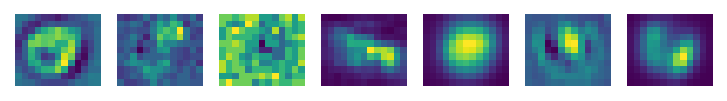

In [45]:
fig, axes = plt.subplots(1, len(pixels), dpi=150, squeeze=False)
axes = axes.ravel()
for p, ax in zip(pixels, axes):
    ax.imshow(p[bbox[0]:bbox[2], bbox[1]:bbox[3]])
    ax.set_axis_off()

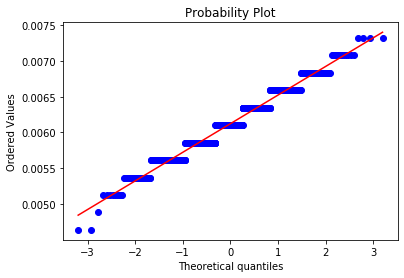

In [46]:
import scipy.stats as stats 
fig, ax = plt.subplots()
_ = stats.probplot(numpy.random.choice(pixels[2].ravel(), size=1000), dist="norm", plot=ax)

In [47]:
from scipy.stats import normaltest
normaltest(numpy.random.choice(pixels[1].ravel(), size=100))

NormaltestResult(statistic=7.9211941755586, pvalue=0.019051735336488296)

In [117]:
from skimage.filters import rank
from skimage.morphology import disk, binary_erosion, diamond, binary_closing, binary_dilation
from skimage import img_as_ubyte
from skimage.restoration import denoise_nl_means
from skimage.filters import threshold_mean, threshold_isodata

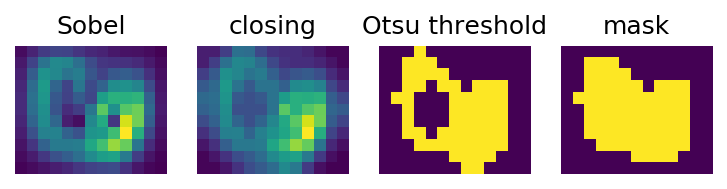

In [135]:
show_c = 6

fig, axes = plt.subplots(1, 4, dpi=150)
for ax in axes:
    ax.set_axis_off()
masked = numpy.zeros_like(pixels, dtype=int)
for i in range(len(pixels)):
    x = pixels[i, bbox[0]:bbox[2], bbox[1]:bbox[3]]
    
    # if normaltest(numpy.random.choice(x.ravel(), size=100)).pvalue < 0.05:
    x = sobel(x)
    if i == show_c:
        axes[0].imshow(x)
        axes[0].set_title("Sobel")

    x = closing(x, selem=disk(1))
    if i == show_c:
        axes[1].imshow(x)
        axes[1].set_title("closing")

    x = threshold_otsu(x) < x
    if i == show_c:
        axes[2].imshow(x)
        axes[2].set_title("Otsu threshold")
        
    x[[0, -1], :] = 0
    x[:, [0, -1]] = 0

    # x = remove_small_holes(x, area_threshold=300)
    # x = remove_small_objects(x, min_size=10)
    # x = binary_erosion(x, disk(2))
    # x = label(x)
    
    # x = expand_labels(label(x), distance=1)
    # x = binary_dilation(x, disk(1))
    x = remove_small_holes(x, area_threshold=20)
    x = remove_small_objects(x, min_size=20)
    x = label(x)
    
    if i == show_c:
        axes[3].imshow(x)
        axes[3].set_title("mask")
    masked[i, bbox[0]:bbox[2], bbox[1]:bbox[3]] = x

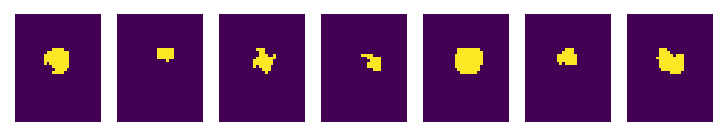

In [136]:
fig, axes = plt.subplots(1, len(pixels), dpi=150, squeeze=False)
axes = axes.ravel()
for p, ax in zip(masked, axes):
    ax.imshow(p)
    ax.set_axis_off()

In [13]:
from skimage.measure import regionprops
list(map(lambda r: r.perimeter, regionprops(label(masked[1]))))

[259.06601717798213, 24.384776310850235, 66.49137802864846]

In [249]:
numpy.any(masked[2])

True

In [30]:
from skimage.io import imread

In [31]:
import os
os.environ["VSC_DATA_VO_USER"]

'/data/gent/vo/000/gvo00070/vsc42015'

In [ ]:
imread('/data/gent/vo/000/gvo00070/vsc42015/datasets/weizmann/EhV/v2/ideas_masks/ExportedMasks/Inf_T0_R1_1_185_Ch1.dmask.pgm')